# Анализ данных сервиса GoFast

**Цели исследования:** 
1) Описать пользователей сервиса;
2) Подсчет выручки;
3) Проверка гипотез:
  - Пользователи с подпиской тратят больше времени на поездки;
  - Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров;
  - Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки;
  - Из-за обновления сервера количество обращений в техподдержку значимо снизилось. 

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.Сервисом можно пользоваться:
1. Без подписки:
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;
2. С подпиской Ultra:
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

**Данные для исследования:**
Данные представлены в трех датасетах:
1) Информация о пользователях:
2) Информация о поездках:
3) Информация о подписках:


**Этапы исследования:**

**Шаг 1. Загрузка данных** - загрузка и общее ознакомление с данными;\
**Шаг 2. Предобработка данных** - приведу столбцы в нужный формат, проверю данные на пропуски и дубликаты;\
**Шаг 3. Исследовательский анализ данных** - опишу и визуализирую общую информацию о пользователях и поездках:
- 3.1 частота встречаемости городов;
- 3.2 соотношение пользователей с подпиской и без подписки;
- 3.3 возраст пользователей;
- 3.4 расстояние, которое пользователь преодолел за одну поездку;
- 3.5 продолжительность поездок.

**Шаг 4. Объединенние данных** - объединю данные о пользователях, поездках и подписках в один датафрейм. Создам ещё два датафрейма:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.
Визуализирую информацию о расстоянии и времени поездок для пользователей обеих категорий;

**Шаг 5. Подсчёт выручки**  - посчитаю помесячную выручку, которую принёс каждый пользователь;\
**Шаг 6. Проверка гипотез** - проверю выдвинутые выше гипотезы;\
**Шаг 7. Вывод** - сформулирую общий вывод по проделанной работе.

##  1. Загрузка данных

In [1]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from scipy import stats as st

In [2]:
#унифицируем размер графиков
sns.set(rc={'figure.figsize':(10, 8)})
#настраиваем отображение колонок (полностью)
pd.set_option('display.max_columns', None)
#настраиваем отображение формата значений
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# откроем файл с пользователями
users=pd.read_csv('/datasets/users_go.csv')
users.info()
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
# откроем файл с поездками
rides=pd.read_csv('/datasets/rides_go.csv')
rides.info()
rides.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,"4,409.92",25.60,2021-01-01
1,1,"2,617.59",15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,"2,694.78",18.51,2021-08-11
4,1,"4,028.69",26.27,2021-08-28
5,1,"2,770.89",16.65,2021-10-09
6,1,"3,039.02",14.93,2021-10-19
7,1,"2,842.12",23.12,2021-11-06
8,1,"3,412.69",15.24,2021-11-14
9,1,748.69,15.04,2021-11-22


In [5]:
# откроем файл с поездками
subs=pd.read_csv('/datasets/subscriptions_go.csv')
subs.info()
subs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Вывод:** В данных содержится информация о 1565 пользователях. Тип столбца с датой в датафрейме с информацией о поездках не соответстует (исправлю на этапе предобработки). В остальных данных на первый взгляд все в порядке. Посмотрим пропуски и дубликаты на следующим этапе.

## 2. Предобработка данных

In [6]:
# поменяем тип столбца с датой на  datetime
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

In [7]:
# проверим за какой период представлены данные
rides['date'].dt.year.unique()

array([2021])

Данные представлены только за один год, соответственно ошибок не будет, при добавлении столбца с месяцем

In [8]:
# добавление столбца 'month' с номером месяца в датафейм 'rides'
rides['month'] = pd.DatetimeIndex(rides['date']).month
rides.head()

,user_id,distance,duration,date,month
0,1,"4,409.92",25.60,2021-01-01,1
1,1,"2,617.59",15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4
3,1,"2,694.78",18.51,2021-08-11,8
4,1,"4,028.69",26.27,2021-08-28,8


Последовательно проверим данные на пропуски во всех таблицах

In [9]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [10]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [11]:
subs.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Проверим данные на явные и неявные дубликаты

In [12]:
users.duplicated().sum()

31

In [13]:
# удалим явные дубликаты 
users.drop_duplicates(inplace=True)
users.duplicated().sum()

0

In [14]:
# проверим данные городов в датафрейме с пользователями на неявные дубликаты
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [15]:
rides.duplicated().sum()

0

**Вывод:** На этапе предобработки были сделаны следующие шаги:
- В процессе предобработки данных в датафрейме 'rides' был добавлен столбец 'month', отражающий месяц поездки, и изменен тип данных столбца с датой на datetime;
- Во всех данных не обнаружено пропусков;
- Явные дубликаты обнаружены и удалены только в датасете с информацией о пользователях.
- Неявные дубликаты не обнаружены

## 3. Исследовательский анализ данных

##### Частота встречаемости городов 

In [16]:
users['city'].value_counts()


Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

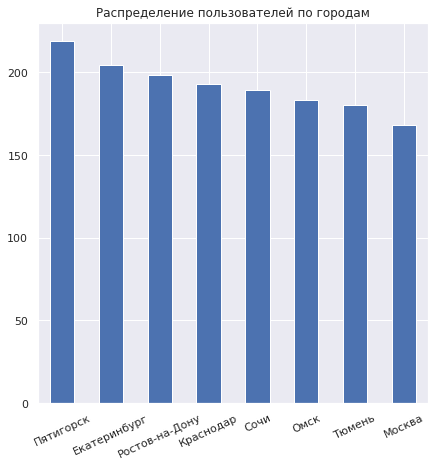

In [17]:
users['city'].value_counts().plot(
                             kind = 'bar', 
                             y = users['city'].value_counts(),
                             figsize=(7,7), 
                             title = 'Распределение пользователей по городам')
plt.xticks(rotation = 25);

Лидером по количеству пользователей является Пятигорск (219 чел.). Наименьшее число в Москве - 168 чел.

##### Cоотношение пользователей с подпиской и без подписки

In [18]:
users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

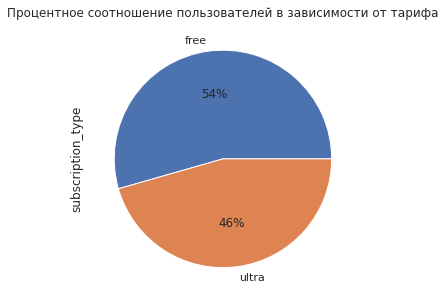

In [19]:
users['subscription_type'].value_counts().plot(
                                          kind = 'pie', 
                                          y = users['subscription_type'].value_counts(), 
                                          autopct = '%1.0f%%', 
                                          figsize=(5,5),
                                          title = 'Процентное соотношение пользователей в зависимости от тарифа');

Пользователей без подписки больше - 54% (835 чел.)

##### Возраст пользователей

In [20]:
users['age'].describe()

count   1,534.00
mean       24.90
std         4.57
min        12.00
25%        22.00
50%        25.00
75%        28.00
max        43.00
Name: age, dtype: float64

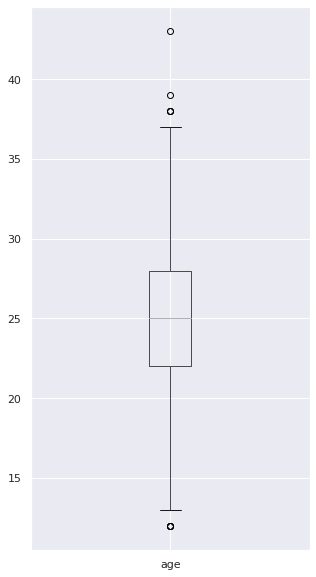

In [21]:
users.boxplot(column='age', figsize=(5,10));

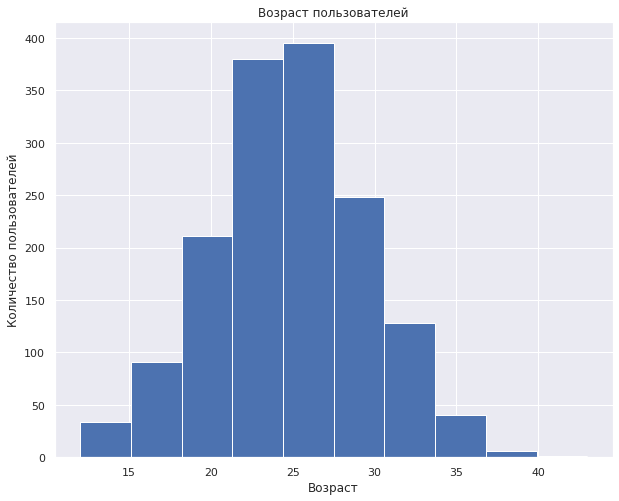

In [22]:
plt.hist(users['age'], bins = 10)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()

Средний возраст пользователей 24.9, медианный 25 лет. Самый молодые пользователи 12-15 лет, также есть небольшая группа пользователей больше 38 (max 43). 

##### Расстояние, которое пользователь преодолел за одну поездку

In [23]:
rides['distance'].describe()

count   18,068.00
mean     3,070.66
std      1,116.83
min          0.86
25%      2,543.23
50%      3,133.61
75%      3,776.22
max      7,211.01
Name: distance, dtype: float64

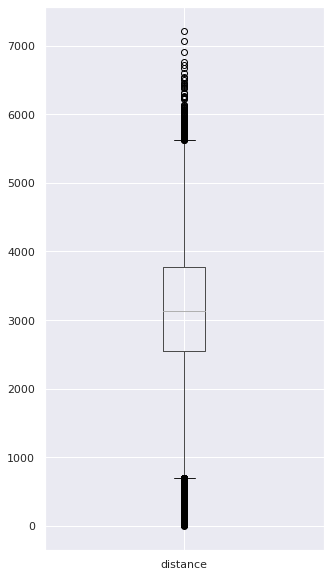

In [24]:
rides.boxplot(column='distance', figsize=(5,10));

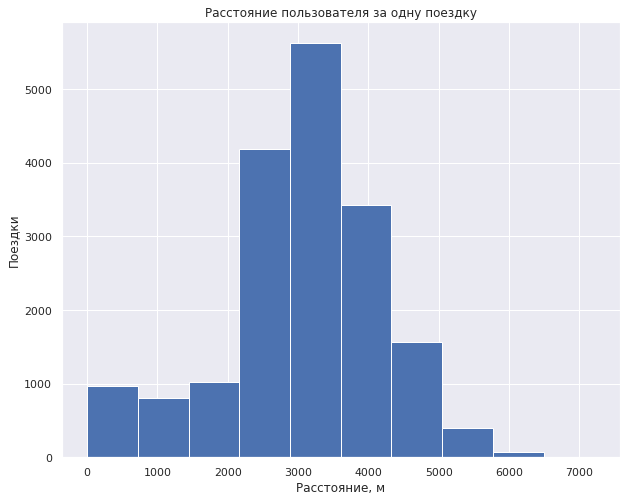

In [25]:
plt.hist(rides['distance'], bins = 10)
plt.title('Расстояние пользователя за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Поездки')
plt.grid(True)
plt.show()

В среднем пользователь преодолевает  3,070.66 м за одну поездку. Медианное значение 3,133.61.  

##### Продолжительность поездок

In [26]:
rides['duration'].describe()

count   18,068.00
mean        17.81
std          6.09
min          0.50
25%         13.60
50%         17.68
75%         21.72
max         40.82
Name: duration, dtype: float64

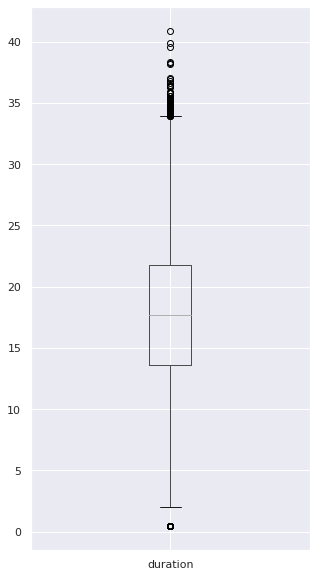

In [27]:
rides.boxplot(column='duration', figsize=(5,10));

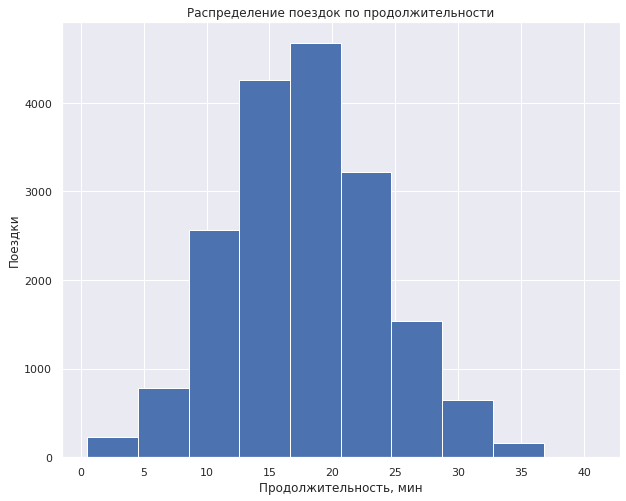

In [28]:
plt.hist(rides['duration'], bins = 10)
plt.title('Распределение поездок по продолжительности')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Поездки')
plt.grid(True)
plt.show()

Средняя продолжительность поездок  17.81 мин, медианная 17.68 мин. 

**Вывод:** Услугами сервиса аренды самокатов пользуются люди от 12 до 43 лет. Максимальное количество пользователей в возрасте 25 лет, этот же возраст является медианным. Большая часть пользователей без подписки - 835 чел.(54%). Максимальное количество в 219 поездок совершено в Пятигорске. Минимальное количество в 168 поездок совершено в Москве. За одну поездку пользователи преодолеваютв среднем 3071 метров. Продолжительность поездок нормально распределена от 0 до 41 минуты. Продолжительность около 18 минут является как наиболее распространенной так и медианным значением. Наблюдаются выбросы с продолжительностью менее 1 минуты и более 35 минут. Однако, они не являются аномалиями, т.к. подкреплены данными о поездках со столь же маленькими или юольшими дистанциями соответственно.

## 4. Объединение данных

In [29]:
# объеденим все данные в один датафрейм
total = users.merge(rides, on='user_id').merge(subs, on='subscription_type')
total.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,"4,409.92",25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,"2,617.59",15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,"2,694.78",18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,"4,028.69",26.27,2021-08-28,8,6,0,199


In [30]:
# Сравним количество строк после объединения
print("Количество строк (поездок) в 'rides':", rides['user_id'].count())
print("Количество строк (поездок) в 'total':", total['user_id'].count())
print()
print("Количество уникальных пользователей в 'users':", len(users['user_id'].unique()))
print("Количество уникальных пользователей в 'total':", len(total['user_id'].unique()))

Количество строк (поездок) в 'rides': 18068
Количество строк (поездок) в 'total': 18068

Количество уникальных пользователей в 'users': 1534
Количество уникальных пользователей в 'total': 1534


In [31]:
# создадим датафрейм данных с пользователями с подпиской
ultra = total.query("`subscription_type` == 'ultra'")
ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,"4,409.92",25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,"2,617.59",15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,"2,694.78",18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,"4,028.69",26.27,2021-08-28,8,6,0,199


In [32]:
# создадим датафрейм данных с пользователями без подписки
free = total.query("`subscription_type` == 'free'")
free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,"2,515.69",14.94,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,16.23,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,"4,004.43",20.02,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,"1,205.91",9.78,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,"3,047.38",17.43,2021-02-14,2,8,50,0


In [33]:
# создадим функцию для сравнения столбцов с количественными данными в разных датафреймах
def quantity_go (data1, data2, column, bins_num, xlabel, ylabel, title, dataname1, dataname2):
        
    data1.rename(columns = {column:dataname1})[dataname1].plot.hist(
        bins=bins_num, 
        #xlim=(data_min, data_max),
        alpha=.5, 
        legend=True,
        grid=True
    )
    data2.rename(columns = {column:dataname2})[dataname2].plot.hist(
        bins=bins_num, 
        #xlim=(data_min, data_max),
        alpha=.5, 
        legend=True,
        grid=True
    )
    
    plt.gca().set(xlabel=f'${xlabel}$', ylabel=f'${ylabel}$')
    plt.title(f'{title}')
    plt.show()

In [34]:
# Функция для сравнения одинаковых столбцов с качественными данными в разных датафреймах
def quality_go (data1, data2, column, xlabel, ylabel, title, dataname1, dataname2, sort=False):
        
    go_count = pd.DataFrame([
        data1.groupby(column)[column].agg('count'), 
        data2.groupby(column)[column].agg('count')
    ])
    go_count.index = [dataname1, dataname2]
    go_count = go_count.transpose()
    if sort == True:
        if go_count[dataname1].sum() >= go_count[dataname2].sum():
            go_count = go_count.sort_values(by=dataname1)
        else:
            go_count = go_count.sort_values(by=dataname2)
    
    go_count.plot.barh(grid=True)
    plt.gca().set(xlabel=f'${xlabel}$', ylabel=f'${ylabel}$')
    plt.title(f'{title}')
    plt.show()
    
    go_percent_sum = go_count[dataname1].sum() + go_count[dataname2].sum()
    go_percent = go_count / go_percent_sum

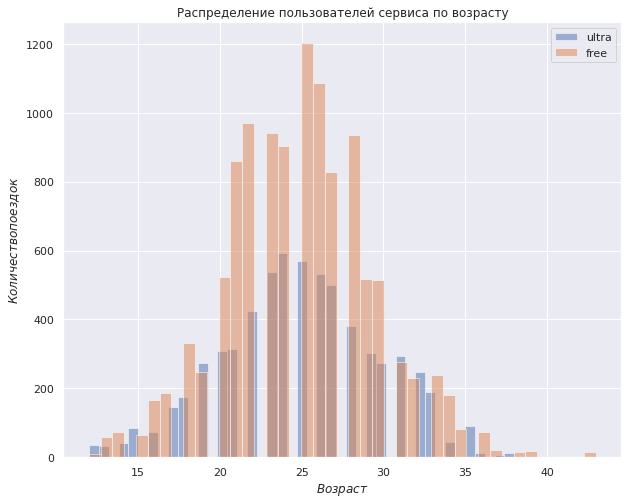

In [35]:
# Сравнение возраста пользователей
quantity_go (
    ultra, 
    free, 
    'age', 
    int(free['age'].max()), 
    'Возраст', 
    'Количество поездок', 
    'Распределение пользователей сервиса по возрасту', 
    'ultra', 
    'free'
)

Возрастные показатели пользователей с разным типом подписки в целом схожи.

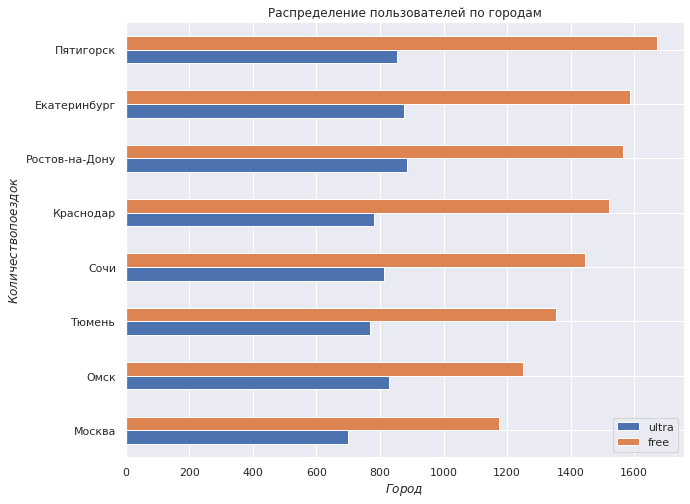

In [36]:
# Сравнение пользователей по городам
quality_go(
    ultra, 
    free, 
    'city', 
    'Город', 
    'Количество поездок', 
    'Распределение пользователей по городам', 
    'ultra', 
    'free',
    True
)

In [37]:
free['city'].value_counts()

Пятигорск         1672
Екатеринбург      1585
Ростов-на-Дону    1565
Краснодар         1521
Сочи              1446
Тюмень            1354
Омск              1250
Москва            1175
Name: city, dtype: int64

In [38]:
ultra['city'].value_counts()

Ростов-на-Дону    885
Екатеринбург      876
Пятигорск         852
Омск              827
Сочи              813
Краснодар         780
Тюмень            767
Москва            700
Name: city, dtype: int64

Больше всего поездок у клиентов без подписки в Пятигорске, а у клиентов с подпиской в Ростове-на Дону. 

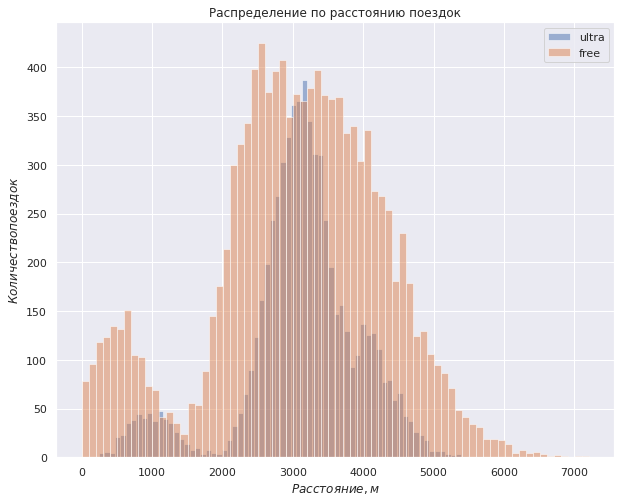

In [39]:
# Срвнение расстояний пользователей
quantity_go(
    ultra, 
    free, 
    'distance', 
    int(free['distance'].max()/100), 
    'Расстояние, м', 
    'Количество поездок', 
    'Распределение по расстоянию поездок', 
    'ultra', 
    'free'
)

In [40]:
free['distance'].describe()

count   11,568.00
mean     3,045.50
std      1,246.17
min          0.86
25%      2,366.56
50%      3,114.65
75%      3,905.70
max      7,211.01
Name: distance, dtype: float64

In [41]:
ultra['distance'].describe()

count   6,500.00
mean    3,115.45
std       836.90
min       244.21
25%     2,785.44
50%     3,148.64
75%     3,560.57
max     5,699.77
Name: distance, dtype: float64

Дистанция поездок без подписки более разнообразна. Об этом же свидетельствует и стандартное отклонение, которое при использовании таких поездках (1246), чем при использовании подписки 'ultra'(837). Средняя дистанция поездок без подписки - 3045м, при поездках с подпиской - 3115 м.

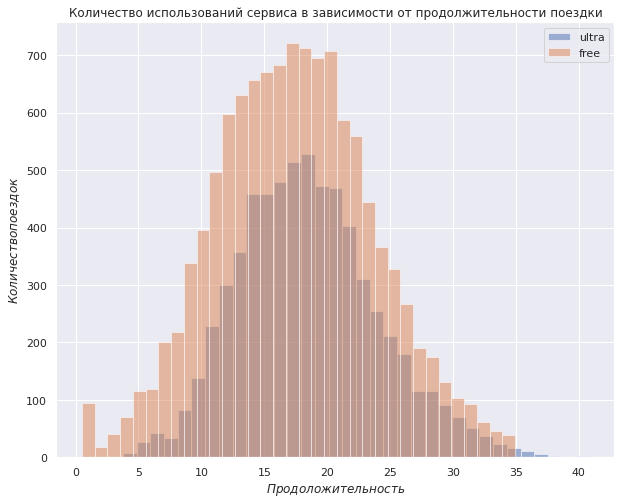

In [42]:
# Срвнение времени поездок
quantity_go(
    ultra, 
    free, 
    'duration', 
    int(free['duration'].max()), 
    'Продоложительность', 
    'Количество поездок', 
    'Количество использований сервиса в зависимости от продолжительности поездки', 
    'ultra', 
    'free'
)

In [43]:
ultra['duration'].describe()

count   6,500.00
mean       18.54
std         5.57
min         3.76
25%        14.52
50%        18.18
75%        21.88
max        40.82
Name: duration, dtype: float64

In [44]:
free['duration'].describe()

count   11,568.00
mean        17.39
std          6.33
min          0.50
25%         12.96
50%         17.33
75%         21.59
max         34.95
Name: duration, dtype: float64

В обоих случаях количество поездок относительно нормально распределено в зависимости от их продолжительности. Пик количества поездок приходится на 17-18 минут в обоих вариантах.

**Вывод:** Возрастные показатели пользователей с разным типом подписки в целом схожи - основные пользователи 25-30 лет. Больше всего поездок у клиентов без подписки в Пятигорске, а у клиентов с подпиской  - в Ростове-на Дону. Дистанция поездок без подписки более разнообразна. Об этом же свидетельствует и стандартное отклонение, которое при таких поездках больше (1246м), чем при использовании подписки 'ultra'(837м). Средняя дистанция поездок без подписки - 3045м, при поездках с подпиской - 3115 м.В обоих случаях количество поездок относительно нормально распределено в зависимости от их продолжительности. Пик количества поездок приходится на 17-18 минут в обоих вариантах.

## 5. Подсчёт выручки

In [45]:
# Найдем суммарное расстояние, количество поeздок и суммарное время для каждого пользователя за каждый месяц
sum_data = pd.pivot_table(total,
                           index=['month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len, 
                                      'subscription_type' : min})

In [46]:
# Округление продолжительности поездок 
sum_data['duration'] = np.ceil(sum_data['duration'])

sum_data

distance  duration  name subscription_type
month user_id                                            
1     1        7,027.51     42.00     2             ultra
      3        3,061.78     13.00     1             ultra
      5        3,914.65     13.00     1             ultra
      7        6,478.08     28.00     2             ultra
      12       3,577.15     33.00     1             ultra
...                 ...       ...   ...               ...
12    1525     4,597.85     34.00     1              free
      1526     3,644.12     23.00     1              free
      1528     3,998.57     11.00     1              free
      1532     6,111.89     41.00     2              free
      1534     2,371.71     16.00     1              free

[11331 rows x 4 columns]

In [47]:
# Добавим столбец с помесячной выручкой

def revenue(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    elif row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['name']
    else:
        return 'Not such sub'
sum_data['revenue_per_month'] = sum_data.apply(revenue, axis=1)
sum_data.head(10)

distance  duration  name subscription_type  revenue_per_month
month user_id                                                               
1     1        7,027.51     42.00     2             ultra             451.00
      3        3,061.78     13.00     1             ultra             277.00
      5        3,914.65     13.00     1             ultra             277.00
      7        6,478.08     28.00     2             ultra             367.00
      12       3,577.15     33.00     1             ultra             397.00
      13       6,687.99     42.00     2             ultra             451.00
      14       7,699.64     34.00     2             ultra             403.00
      15       4,187.62     39.00     1             ultra             433.00
      20       3,516.72     29.00     1             ultra             373.00
      22       3,058.69     13.00     1             ultra             277.00

**Вывод:** Создали новый датафрейм с агрегированными данными на основе датафрейма с объединенными данными.
Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавили столбец с помесячной выручкой, которую принес каждый пользователь.

## 6. Проверка гипотез

##### Пользователи с подпиской тратят больше времени на поездки
 
Нулевая и альтернативная гипотезы:
- Гипотеза Н0: Средняя продолжительность поездок с подпиской 'ultra' и 'free' равна. 
- Гипотеза Н1: Средняя продолжительность поездок с подпиской 'ultra' больше, чем с 'free'.

In [48]:
ultra_sub = ultra['duration'] 

free_sub = free['duration']

results = st.ttest_ind(ultra_sub, 
                       free_sub,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


##### Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

Нулевая и альтернативная гипотезы:
- Гипотеза Н0: Среднее расстояние поездок с использованием подписки 'ultra' равно расстоянию в 3130 метров.
- Гипотеза Н1: Среднее расстояние поездок с использованием подписки 'ultra' более 3130 метров.

In [49]:
results = st.ttest_1samp(ultra['distance'], 3130, alternative='greater')
print(results.pvalue)
if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


##### Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Нулевая и альтернативная гипотезы:
- Гипотеза Н0: Средняя выручка от поездок с разной подпиской равна.
- Гипотеза Н1: Средняя выручка от поездок с использованием подписки 'ultra' больше, чем выручка без подписки.

In [50]:
ultra_per_mnth = sum_data.loc[sum_data.subscription_type == 'ultra', 'revenue_per_month'] 

free_per_mnth = sum_data.loc[sum_data.subscription_type == 'free', 'revenue_per_month'] 


results = st.ttest_ind(ultra_per_mnth, 
                       free_per_mnth,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

2.8130926188487286e-35
Отвергаем нулевую гипотезу


##### Из-за обновления сервера количество обращений в техподдержку значимо снизилось. Какой тест понадобится для проверки гипотезы?

Будем использовать гипотезу о равенстве средних для зависимых (парных) выборок.\
Гипотезы будут сформулированы так:
-H0 : μ1 = μ2
-H1 : μ1 != μ2\
где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel()

**Вывод:** Было проверено 3 гипотезы:
1) Гипотеза о том, что средняя продолжительность поездок с подпиской 'ultra' и 'free' равна не подтвердилась;\
2) Проверили гипотезу, и мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra не превышает 3130 метров;\
3) Гипотеза о том, что средняя месячная выручка поездок с разной подпиской равна, не подтвердилась

#### Шаг. Общий вывод


Загрузили 3 датафрейма: с пользователями, информацией о поездках, информацией о подписках.\
На этапе предобработки были сделаны следующие шаги:
- В процессе предобработки данных в датафрейме 'rides' был добавлен столбец 'month', отражающий месяц поездки, и изменен тип данных столбца с датой на datetime;
- Во всех данных не обнаружено пропусков;
- Явные дубликаты обнаружены и удалены только в датасете с информацией о пользователях.
- Неявные дубликаты не обнаружены.

По результатам исследовательского анализа можно сказать, что услугами сервиса пользуются люди от 12 до 43 лет. Максимальное количество пользователей в возрасте 25 лет, этот же возраст является медианным. Большая часть пользователей без подписки - 835 чел.(54%). Максимальное количество в 219 поездок совершено в Пятигорске. Минимальное количество в 168 поездок совершено в Москве. За одну поездку пользователи преодолевают в среднем 3071 метров. Продолжительность поездок нормально распределена от 0 до 41 минуты. Продолжительность около 18 минут является наиболее распространенной.

При сравнении разных подписок можно выделить следующее:\
Возрастные показатели пользователей с разным типом подписки в целом схожи - основные пользователи 25-30 лет. Больше всего поездок у клиентов без подписки в Пятигорске, а у клиентов с подпиской - в Ростове-на Дону. Дистанция поездок без подписки более разнообразна. Об этом же свидетельствует и стандартное отклонение, которое при таких поездках больше (1246м), чем при использовании подписки 'ultra'(837м). Средняя дистанция поездок без подписки - 3045м, при поездках с подпиской - 3115 м. В обоих случаях количество поездок относительно нормально распределено в зависимости от их продолжительности. Пик количества поездок приходится на 17-18 минут в обоих вариантах.

Было проверено 3 гипотезы:
1) Гипотеза о том, что средняя продолжительность поездок с подпиской 'ultra' и 'free' равна не подтвердилась;\
2) Мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra не превышает 3130 метров;\
3) Гипотеза о том, что средняя месячная выручка поездок с разной подпиской равна, не подтвердилась.